# Imports

In [2]:
import requests, json 
import pandas as pd
import googlemaps
from datetime import datetime
import ast
import pandas as pd
from pandas.io.json import json_normalize
import geopy.distance
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns


## Relation between traffic and number of supermarkets

In [7]:
new_bus=pd.read_csv("new_bus_dist.csv") #We constructed this dataframe using the file "Passenger Frequency" and a function
                                        #that counts how many supermarkets (constructed using the file "_supermarket") are 
                                        #around a given coordinate. (r=1 gives the number of supermarket in a 1 km radius, r=2
                                        # km and so on).
new_bus["entries_exit"]=new_bus["People_enter"]+new_bus["People_exit"]
new_bus.head() #For each station we have geographical information and the number of people entering/exiting/staing in
               #the bus/train in that station.

,Unnamed: 0,Stop_Id,Bus Stop Name,Y_KOORD,X_KOORD,E_global,N_global,People_enter,People_exit,Occupacy,r=1,r=2,r=3,r=4,r=5,coord_x,coord_y,swiss coordinates,district,entries_exit
0,0,244,"Zürich, Bahnhofplatz/HB",1247962,2683122,47.377247,8.539298,21.548972,15.458534,38.389427,13.0,63,149,215,249,2683122,1247962,"(2683122, 1247962)","[1, 'City', 14]",37.007505
1,1,114,"Zürich, Bahnhofstrasse/HB",1247848,2683135,47.376220,8.539449,20.388233,17.760452,36.999778,16.0,79,159,236,284,2683135,1247848,"(2683135, 1247848)","[1, 'Lindenhof', 13]",38.148685
2,2,119,"Zürich, Bahnhof Stadelhofen",1246752,2683808,47.366278,8.548154,19.951719,10.087455,35.683084,39.0,114,166,230,291,2683808,1246752,"(2683808, 1246752)","[1, 'Hochschulen', 12]",30.039174
3,3,431,"Zürich, Bahnhof Stettbach",1250250,2687381,47.397272,8.596132,19.452343,0.000000,19.452343,10.0,17,28,90,145,2687381,1250250,"(2687381, 1250250)","[12, 'Hirzenbach', 123]",19.452343
4,4,96,"Zürich, Bahnhof Oerlikon Nord",1251875,2683417,47.412400,8.543933,18.948286,0.073416,19.063844,8.0,29,88,154,222,2683417,1251875,"(2683417, 1251875)","[11, 'Oerlikon', 115]",19.021702


In [9]:
#some cleaning
new_x=list(new_bus["entries_exit"])
new_y=new_bus["r=1"].tolist()
new_bus["log_entries_exit"]= np.log(new_bus['entries_exit'])
new_x=list(new_bus["log_entries_exit"])
new_x=[[i] for i in new_x]

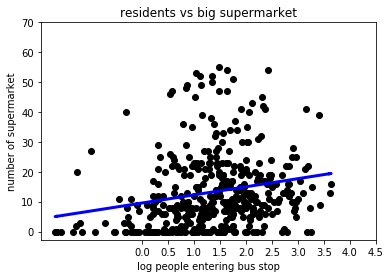

Coefficients: 
 [2.71043413]


In [11]:
# Fit a linear model and plot
regr = linear_model.LinearRegression()
regr.fit(new_x, new_y)
plt.scatter(new_x, new_y,  color='black')
plt.plot(new_x, regr.predict(new_x), color='blue', linewidth=3)


plt.xlabel("log people entering bus stop")
plt.ylabel("number of supermarket")
plt.title('residents vs big supermarket')

plt.xticks((np.arange(0,5,0.5)))
plt.yticks((np.arange(0,80,10)))
plt.show()

print('Coefficients: \n', regr.coef_)